<h1>Tracker : suivi du centre de la forme par rapport au repère rose</h1>

<p>Un pointage d'une forme facilement repérable à partir de la vidéo de l'expérience a permis d'enregistrer, au cours du temps, les coordonnées cartésiennes du centre de la forme dans le repère rose (repère liée à la caméra) de la vidéo.<p>
<p>
    A partir d'un pointage automatisé, les coordonnées du point sont consultables dans le fichier <a href="./inertie.csv" target="_blank">inertie.csv</a>.<br/>
</p>
<br/>
<p style="text-align:center;"><img src="./inertie.jpg" alt="Image manquante" width="700" /></p>
<br/>
<p>Le repère rose a été fixé de manière arbitraire. La direction verticale ne l'est pas forcément sur la vidéo car c'est la caméra qui est peut-être pencher. Nous résoudrons ce problème ultérieurement.</p>
<p>Le trait bleu permet de donner un facteur d'échelle entre la taille connue d'un objet et les pixels.</p>

<h1>Traitement du fichier des données</h1>

<p class="question">
    Importons les données du fichier <a href="./inertie.csv" target="_blank">inertie.csv</a> pour récupérer les données de chaque variable dans des tableaux numpy :<br>
    <span style="padding:0 0 0 25px;">&bull; le temps sous le nom de variable <code>t</code></span><br/>
    <span style="padding:0 0 0 25px;">&bull; l'abscisse du point sous le nom de variable <code>x</code></span><br>
    <span style="padding:0 0 0 25px;">&bull; l'ordonnée du point sous le nom de variable <code>y</code></span><br>
</p>

In [1]:
from numpy import genfromtxt, char, array

# Nom du fichier
fichier = 'inertie.csv'
# lire le fichier texte
donnees = genfromtxt(fichier, dtype=str, delimiter=';', skip_header=2, unpack=True)
# remplacer la virgule par un point
donnees = char.replace(donnees, ',', '.')
# convertir la chaine de caractère en flottant
t, x, y = array(donnees, dtype=float)

<h1>Affichage du point par rapport au repère rose au cours du temps</h1>

<p>
    Affichons l'ordonnée <code>y</code> du point  en fonction l'abscisse <code>x</code> du point au cours du temps.<br/>
</p>

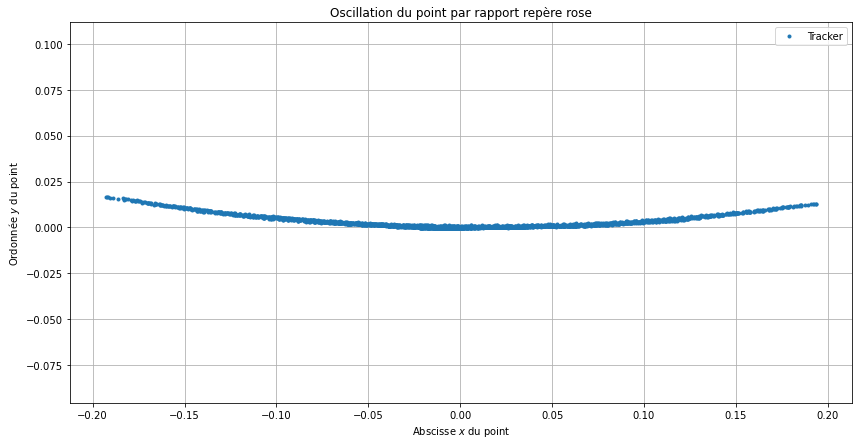

In [2]:
import matplotlib.pyplot as plt

# FIGURE
# Création
plt.figure(figsize=(14, 7))
# GRAPHIQUE
# Création
plt.subplot(1, 1, 1)
# Courbe
plt.plot(x, y, '.', label='Tracker')
# Titre
plt.title(r'Oscillation du point par rapport repère rose')
# Legende
plt.legend(loc='best')
# Nom des axe
plt.xlabel(r'Abscisse $x$ du point')
plt.ylabel(r'Ordonnée $y$ du point')
# Afficher une grille en arrière plan
plt.grid()
# Mettre à l'échelle les deux axes
plt.axis('equal')
# Afficher la figure
plt.show()

<h1>Retrouver le centre du cercle de la trajectoire des points</h13>

<p>Il est nécesssaire de trouver le centre du cercle passant au mieux des points pour obtenir l'angle d'oscillation par rapport au repère galilléen. Cela permet ainsi de résoudre le problème de la caméra penchée.</p>
<p>Le code ci-dessous permet de le faire par la <a href="https://fr.wikipedia.org/wiki/R%C3%A9gression_circulaire" target="_blank">régression circulaire par la méthode des moindres carrés</a>.</p>
<p class="question">
    Il vous suffit de compiler le code ci-dessous. Il vous retourne<br/>
    <span style="padding:0 0 0 25px;">&bull; l'abcisse du centre du cercle sous le nom de variable <code>xC</code></span><br/>
    <span style="padding:0 0 0 25px;">&bull; l'ordonnée du centre du cercle sous le nom de variable <code>yC</code></span><br/>
    <span style="padding:0 0 0 25px;">&bull; le diamètre du cercle sous le nom de variable <code>D</code></span><br/>
</p>

In [3]:
from numpy import sqrt


def cercle(x, y):
    Sxi, Syi, Sxiyi, Sxi2, Syi2, Sxiyi2, Sxi2yi, Sxi3, Syi3 = 0, 0, 0, 0, 0, 0, 0, 0, 0

    n = len(x)

    for i in range(n):
        Sxi    += x[i]
        Syi    += y[i]
        Sxiyi  += x[i]*y[i]
        Sxi2   += x[i]**2
        Syi2   += y[i]**2
        Sxiyi2 += x[i]*(y[i]**2)
        Sxi2yi += (x[i]**2)*y[i]
        Sxi3   += x[i]**3
        Syi3   += y[i]**3

    a = Sxi2-((Sxi**2)/n)
    b = Sxiyi-(Sxi*Syi/n)
    c = Syi2-((Syi**2)/n)
    d = (Sxi3+Sxiyi2-(Sxi*(Sxi2+Syi2)/n))/2
    e = (Syi3+Sxi2yi-(Syi*(Sxi2+Syi2)/n))/2

    xC = (c*d-b*e)/(a*c-b**2)
    yC = (a*e-b*d)/(a*c-b**2)
    R = sqrt(((Sxi2+Syi2-2*(xC*Sxi+yC*Syi))/n)+xC**2+yC**2)

    return xC, yC, 2*R


xC, yC, D = cercle(x, y)

print('Le cercle a pour centre du cercle d’abscisse xC de '+f'{xC:.3f}'+' m et d’ordonnée yC de '+f'{yC:.3f}'+' m et de diamètre D de '+f'{D:.3f}'+' m.</p>')


def cicularite(xC, yC, R, x, y):
    listeEcarts = []

    for i in range(len(x)):
        Ei = sqrt((x[i]-xC)**2+(y[i]-yC)**2) - R
        listeEcarts.append(Ei)

    Emax, Emin = max(listeEcarts), min(listeEcarts)

    return Emin, Emax


Emin, Emax = cicularite(xC, yC, D/2, x, y)

Le cercle a pour centre du cercle d’abscisse xC de 0.012 m et d’ordonnée yC de 1.246 m et de diamètre D de 2.491 m.</p>


<p class="question">Affichons le résultat</p>

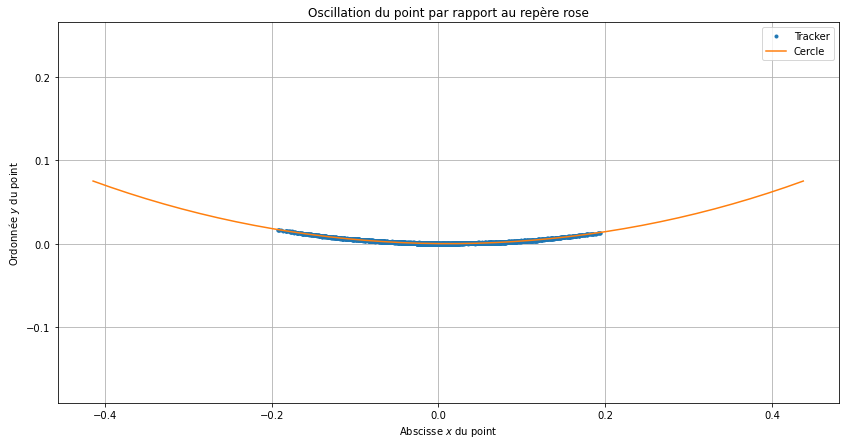

In [4]:
import matplotlib.pyplot as plt

# FIGURE
# Création
plt.figure(figsize=(14, 7))
# GRAPHIQUE
# Création
plt.subplot(1, 1, 1)
# Courbe
plt.plot(x, y, '.', label='Tracker')

# Cercle
from numpy import radians, linspace, cos, sin
angle = 20
angle = radians(linspace(270-angle, 270+angle, int(2*angle)))
plt.plot(xC+D/2*cos(angle), yC+D/2*sin(angle), '-', label='Cercle')
#plt.plot(xC+(D/2+Emax)*cos(angle),yC+(D/2+Emax)*sin(angle),'g',label='Cercle maximum')
#plt.plot(xC+(D/2+Emin)*cos(angle),yC+(D/2+Emin)*sin(angle),'g',label='Cercle minimum')

# Titre
plt.title(r'Oscillation du point par rapport au repère rose')
# Legende
plt.legend(loc='best')
# Nom des axe
plt.xlabel(r'Abscisse $x$ du point')
plt.ylabel(r'Ordonnée $y$ du point')
# Afficher une grille en arrière plan
plt.grid()
# Mettre à l'échelle les deux axes
plt.axis('equal')
# Afficher la figure
plt.show()

<h1>L'angle d'oscillation $\theta$ par rapport au repère galiléen</h1>

In [5]:
from numpy import arctan
theta = arctan((x-xC)/(yC-y))

<p>Affichons l'angle d'oscillation $\theta$ par rapport au repère galiléen en fonction du temps.</p>

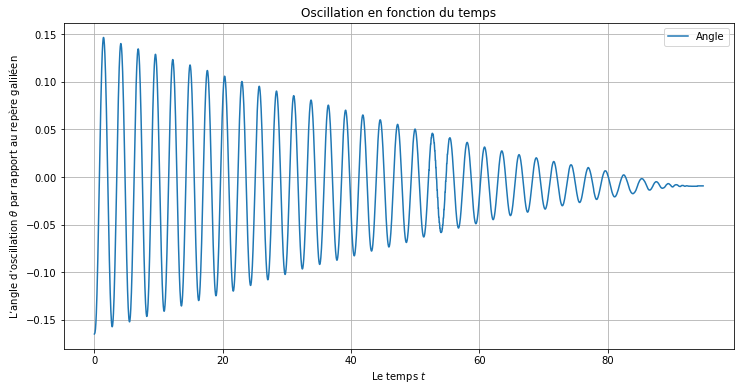

In [8]:
import matplotlib.pyplot as plt

# FIGURE
# Création
plt.figure(figsize=(12,6))

# GRAPHIQUE
# Création
plt.subplot(1,1,1)
# Courbe
plt.plot(t, theta, '-', label='Angle')
# Titre
plt.title(r'Oscillation en fonction du temps')
# Legende
plt.legend(loc='best')
# Nom des axe
plt.xlabel(r'Le temps $t$')
plt.ylabel(r'L’angle d’oscillation $\theta$ par rapport au repère galiléen')
# Afficher une grille en arrière plan
plt.grid()

# Afficher la figure
plt.show()

<h1>A vous de jouer !</n1>

A partir des données de <code>theta</code> l'angle d'oscillation $\theta$ par rapport au repère galiléen, déterminer de manière précise la péride de l'oscillation